In [1]:
### Importing necessary libraries ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import seaborn as sns 
import scipy.stats  as stats
import statsmodels.api as sm


### Importing the reviews for all action movies from 2017-2021

In [4]:
action_url ="https://raw.githubusercontent.com/ddb336/CSS-IMDb-Dataset/main/Data/genres-combined/Action_reviews_combined.csv"

In [6]:
action = pd.read_csv(action_url)

action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37212 entries, 0 to 37211
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_id                      37212 non-null  object 
 1   review_title                  37212 non-null  object 
 2   review_title_sentiment_score  37212 non-null  float64
 3   review_text_sentiment_score   37212 non-null  float64
 4   date                          37212 non-null  object 
 5   rating                        37212 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 1.7+ MB


In [7]:
action.head()

,title_id,review_title,review_title_sentiment_score,review_text_sentiment_score,date,rating
0,tt2015381,There's 2 hours I'll never get back\n,0.0000,-0.3909,2021-03-28 00:00:00,4
1,tt2015381,I AM Amazed\n,0.4939,0.9863,2021-03-20 00:00:00,10
2,tt2015381,LITERALLY ONE OF THE FUNNIEST MOVIES YOU CAN ...,0.5574,0.9832,2021-03-19 00:00:00,9
3,tt2015381,my opinion\n,0.0000,0.8833,2021-03-18 00:00:00,8
4,tt2015381,An obvious flawless scifi comedy comic book M...,0.9572,0.9785,2021-03-12 00:00:00,10


### Data Filtering

#### Fixing the 'date' column

In [9]:
## Chekcing the date column as it is an important independent variable in our research
action['date']

0        2021-03-28 00:00:00
1        2021-03-20 00:00:00
2        2021-03-19 00:00:00
3        2021-03-18 00:00:00
4        2021-03-12 00:00:00
                ...         
37207    2017-03-12 00:00:00
37208    2017-01-04 00:00:00
37209    2020-06-10 00:00:00
37210    2020-02-19 00:00:00
37211    2018-03-24 00:00:00
Name: date, Length: 37212, dtype: object

In [10]:
action['date'] = pd.to_datetime(action['date'])

# action['date'] = pd.DatetimeIndex(action['date']).year
# action['date'] = pd.to_datetime(action['date'],format='%m%Y', errors='coerce')



In [11]:
action.head()

,title_id,review_title,review_title_sentiment_score,review_text_sentiment_score,date,rating
0,tt2015381,There's 2 hours I'll never get back\n,0.0000,-0.3909,2021-03-28,4
1,tt2015381,I AM Amazed\n,0.4939,0.9863,2021-03-20,10
2,tt2015381,LITERALLY ONE OF THE FUNNIEST MOVIES YOU CAN ...,0.5574,0.9832,2021-03-19,9
3,tt2015381,my opinion\n,0.0000,0.8833,2021-03-18,8
4,tt2015381,An obvious flawless scifi comedy comic book M...,0.9572,0.9785,2021-03-12,10


In [12]:
action.dtypes

title_id                                object
review_title                            object
review_title_sentiment_score           float64
review_text_sentiment_score            float64
date                            datetime64[ns]
rating                                   int64
dtype: object

#### Fixing the sentiment analysis columns

In [13]:
action.rename(columns={'review_title_sentiment_score': 'title_score', 'review_text_sentiment_score': 'text_score'},inplace=True)

In [14]:
action.head()

,title_id,review_title,title_score,text_score,date,rating
0,tt2015381,There's 2 hours I'll never get back\n,0.0000,-0.3909,2021-03-28,4
1,tt2015381,I AM Amazed\n,0.4939,0.9863,2021-03-20,10
2,tt2015381,LITERALLY ONE OF THE FUNNIEST MOVIES YOU CAN ...,0.5574,0.9832,2021-03-19,9
3,tt2015381,my opinion\n,0.0000,0.8833,2021-03-18,8
4,tt2015381,An obvious flawless scifi comedy comic book M...,0.9572,0.9785,2021-03-12,10


In [15]:
action.dtypes

title_id                object
review_title            object
title_score            float64
text_score             float64
date            datetime64[ns]
rating                   int64
dtype: object

In [16]:
action

,title_id,review_title,title_score,text_score,date,rating
0,tt2015381,There's 2 hours I'll never get back\n,0.0000,-0.3909,2021-03-28,4
1,tt2015381,I AM Amazed\n,0.4939,0.9863,2021-03-20,10
2,tt2015381,LITERALLY ONE OF THE FUNNIEST MOVIES YOU CAN ...,0.5574,0.9832,2021-03-19,9
3,tt2015381,my opinion\n,0.0000,0.8833,2021-03-18,8
4,tt2015381,An obvious flawless scifi comedy comic book M...,0.9572,0.9785,2021-03-12,10
...,...,...,...,...,...,...
37207,tt1935302,"Fool me once, shame on you, fool me twice, sh...",-0.9001,-0.9364,2017-03-12,1
37208,tt1935302,Total trash\n,0.0000,-0.8843,2017-01-04,1
37209,tt2678948,A well taken family crime picture\n,-0.3400,0.2263,2020-06-10,10
37210,tt2678948,OLD WINE\n,0.0000,0.8481,2020-02-19,7


In [335]:
# action['date'] = action['date'].values.astype(float)

In [337]:
# df = action[(action['date'] > '2020-3-1') & (action['date'] <= '2020-3-31')]


In [338]:
# df

,title_id,review_title,review_title_sentiment_score,review_text_sentiment_score,date,rating
175,tt2267998,gone girl\n,0.0000,0.2263,2020-03-31,9
176,tt2267998,Hot\n,0.0000,0.3612,2020-03-31,10
177,tt2267998,Watching this movie made me feel sick\n,-0.5106,-0.7100,2020-03-30,2
178,tt2267998,Thought-provoking\n,0.0000,0.9937,2020-03-30,8
179,tt2267998,Fair but not fair enough\n,-0.2006,0.6808,2020-03-28,8
...,...,...,...,...,...,...
20126,tt2180994,Entertaining\n,0.4404,0.9633,2020-03-02,8
20127,tt2180994,A Good Marriage = A Bad Movie\n,-0.1531,0.7935,2020-03-02,3
20160,tt3896738,Australian gem about a sexual-predator serial...,-0.6486,-0.9531,2020-03-09,7
20238,tt4382872,Great Fight Scenes\n,0.3612,0.5994,2020-03-18,9


In [181]:
action.dtypes

title_id                object
review_title            object
title_score            float64
text_score             float64
date            datetime64[ns]
rating                   int64
year                     int64
month                    int64
dtype: object

### Getting data on monthly and yearly basis

In [22]:
action['year']=action['date'].dt.year
action['month']=action['date'].dt.month
t = action.groupby(['year','month']).mean()

In [21]:
action['year']=action['date'].dt.year
action['month']=action['date'].dt.month
m = action.groupby(['year','month']).std()

<AxesSubplot:xlabel='month'>

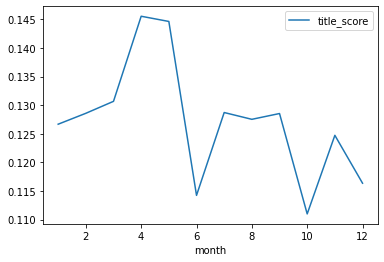

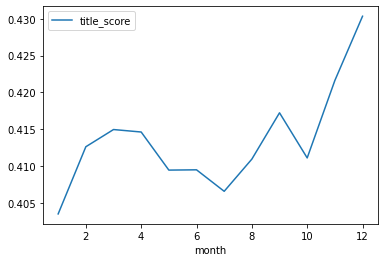

In [23]:
t.xs(key=2020,axis=0,level='year').plot(y='title_score')
m.xs(key=2020,axis=0,level='year').plot(y='title_score')

## Visualizations

<AxesSubplot:xlabel='year,month'>

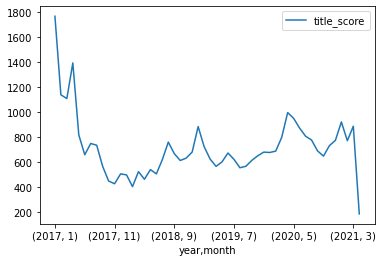

In [29]:
count = action.groupby(['year','month']).count()
count.plot(y='title_score')

<AxesSubplot:xlabel='month'>

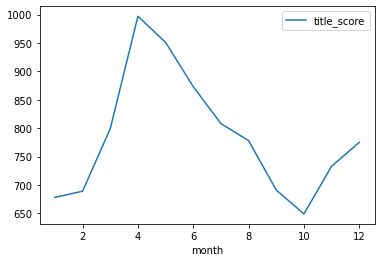

In [30]:
count.xs(key=2020,axis=0,level='year').plot(y='title_score')

<Figure size 864x432 with 0 Axes>

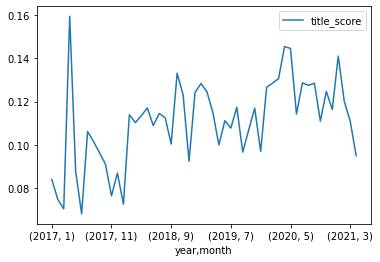

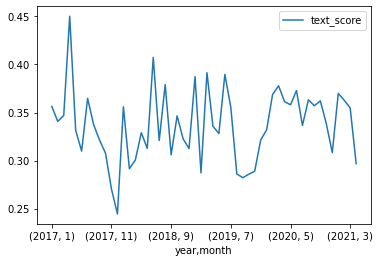

In [31]:
## Plotting title and text scores
plt.figure(figsize=(12,6))
t.plot(y='title_score')
t.plot(y='text_score')
plt.legend()

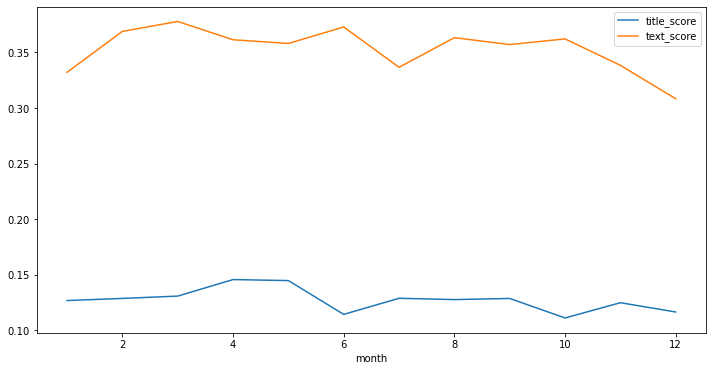

In [27]:
plt.figure(figsize=(12,6))
t.xs(key=2020,axis=0,level='year')['title_score'].plot(label='title_score')
t.xs(key=2020,axis=0,level='year')['text_score'].plot(label='text_score')
plt.legend()

In [21]:
### Testing for overall changes in mood and reviews over time 

In [37]:
# action['date'].loc["2020-03-31"]


In [184]:
# sns.barplot(x='date',y='text_score',data=action)

In [310]:
action['text_score'].unique()

array([ 0.981 ,  0.    , -0.9966, ..., -0.4316, -0.4489,  0.0036])

In [17]:
# fig = plt.figure(figsize=(120,120))
# sns.barplot(x='date',y='review_text_sentiment_score',data=action)
# plt.xticks(rotation=50)
# plt.tight_layout()

In [18]:
# fig = plt.figure(figsize=(12,12))
# sns.barplot(x='date',y='text_score',data=df)
# plt.xticks(rotation=50)
# plt.tight_layout()

In [ ]:
# fig = plt.figure(figsize=(12,12))
# sns.barplot(x='date',y='text_score',data=action)
# plt.xticks(rotation=50)
# plt.tight_layout()

In [19]:
# fig = plt.figure(figsize=(12,12))
# # plt.scatter('date','review_title_sentiment_score',data=action['date'].loc[])
# sns.distplot(action['data'].loc['2020-01-01':'2020-12-31'],color='green',bins=100)
# # sns.clustermap(data=action)
# plt.xticks(rotation=50)

In [153]:
action.corr()

,title_score,text_score,rating,year,month
title_score,1.000000,0.326019,0.412286,0.038142,-0.006232
text_score,0.326019,1.000000,0.441208,0.025683,-0.020261
rating,0.412286,0.441208,1.000000,0.026794,-0.006165
year,0.038142,0.025683,0.026794,1.000000,-0.080789
month,-0.006232,-0.020261,-0.006165,-0.080789,1.000000


NameError: name 'vix_on_gdp' is not defined

In [169]:
y=action['text_score']
x=action['title_score']
text_title = sm.OLS(y,x, intercept=True)
# vix_on_gdp = pd.ols(y=df['VIXCLS'], x=df['GDP'], intercept=True)
results = text_title.fit()

results.params

title_score    0.65434
dtype: float64

In [173]:
print(results.t_test(1))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.6543      0.012     53.396      0.000       0.630       0.678


In [177]:
y1=action['text_score']
x1=action['rating']
text_rating = sm.OLS(y1,x1, intercept=True)
# vix_on_gdp = pd.ols(y=df['VIXCLS'], x=df['GDP'], intercept=True)
results1 =text_rating.fit()

results1.params

rating    0.047084
dtype: float64

In [178]:
print(results1.t_test(1))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0471      0.001     63.812      0.000       0.046       0.049
